# Importing the data

In [38]:
import pandas as pd

# Load the newly uploaded dataset to analyze its structure and identify key columns for stemming
file_path = 'Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information to identify key columns for stemming
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Applicant ID             500 non-null    int64  
 2   Job Experience Required  500 non-null    object 
 3   Key Skills               500 non-null    object 
 4   Role Category            463 non-null    object 
 5   Location                 489 non-null    object 
 6   Functional Area          489 non-null    object 
 7   Industry                 489 non-null    object 
 8   Role                     486 non-null    object 
 9   Longitude                473 non-null    float64
 10  Latitude                 473 non-null    float64
 11  sal                      500 non-null    int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 47.0+ KB


(                                           Job Title  Applicant ID  \
 0                              Digital Media Planner             1   
 1                           Online Bidding Executive             2   
 2   Trainee Research/ Research Executive- Hi- Tec...             3   
 3                                  Technical Support             4   
 4                  Software Test Engineer -hyderabad             5   
 
   Job Experience Required                                         Key Skills  \
 0              5 - 10 yrs                      Media Planning| Digital Media   
 1               2 - 5 yrs   pre sales| closing| software knowledge| clien...   
 2               0 - 1 yrs   Computer science| Fabrication| Quality check|...   
 3               0 - 5 yrs                                  Technical Support   
 4               2 - 5 yrs   manual testing| test engineering| test cases|...   
 
                                 Role Category   Location  \
 0                     

In [39]:
import nltk
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

# Download required NLTK resources

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to apply stemming
def stem_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""
    words = word_tokenize(text)  # Tokenize the text
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming
    return " ".join(stemmed_words)  # Rejoin words into a string

# Apply stemming to the relevant columns
for column in ['Job Title', 'Key Skills', 'Functional Area']:
    data[f'{column} Stemmed'] = data[column].apply(stem_text)

# Display the updated DataFrame
data[['Job Title', 'Job Title Stemmed', 'Key Skills', 'Key Skills Stemmed', 'Functional Area', 'Functional Area Stemmed']].head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Job Title,Job Title Stemmed,Key Skills,Key Skills Stemmed,Functional Area,Functional Area Stemmed
0,Digital Media Planner,digit media planner,Media Planning| Digital Media,media planning| digit media,"Marketing , Advertising , MR , PR , Media Plan...","market , advertis , mr , pr , media plan"
1,Online Bidding Executive,onlin bid execut,pre sales| closing| software knowledge| clien...,pre sales| closing| softwar knowledge| clients...,"Sales , Retail , Business Development","sale , retail , busi develop"
2,Trainee Research/ Research Executive- Hi- Tec...,traine research/ research executive- hi- tech ...,Computer science| Fabrication| Quality check|...,comput science| fabrication| qualiti check| in...,"Engineering Design , R&D","engin design , r & d"
3,Technical Support,technic support,Technical Support,technic support,"IT Software - Application Programming , Mainte...","it softwar - applic program , mainten"
4,Software Test Engineer -hyderabad,softwar test engin -hyderabad,manual testing| test engineering| test cases|...,manual testing| test engineering| test cases| ...,IT Software - QA & Testing,it softwar - qa & test


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from scipy.sparse import hstack

# Fill missing values with an empty string in the columns for TF-IDF
uploaded_data['Job Title Stemmed'].fillna('', inplace=True)
uploaded_data['Key Skills Stemmed'].fillna('', inplace=True)
uploaded_data['Functional Area Stemmed'].fillna('', inplace=True)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed

# Apply TF-IDF Vectorization to the relevant columns
job_title_tfidf = tfidf_vectorizer.fit_transform(uploaded_data['Job Title Stemmed'])
key_skills_tfidf = tfidf_vectorizer.fit_transform(uploaded_data['Key Skills Stemmed'])
functional_area_tfidf = tfidf_vectorizer.fit_transform(uploaded_data['Functional Area Stemmed'])

# Display the shape of the resulting TF-IDF matrices
print("TF-IDF Matrix for Job Title Stemmed Shape:", job_title_tfidf.shape)
print("TF-IDF Matrix for Key Skills Stemmed Shape:", key_skills_tfidf.shape)
print("TF-IDF Matrix for Functional Area Stemmed Shape:", functional_area_tfidf.shape)

# Combine the TF-IDF matrices into a single feature matrix (optional)
combined_features = hstack([job_title_tfidf, key_skills_tfidf, functional_area_tfidf])

# Display the shape of the combined feature matrix
print("Combined Feature Matrix Shape:", combined_features.shape)


TF-IDF Matrix for Job Title Stemmed Shape: (500, 100)
TF-IDF Matrix for Key Skills Stemmed Shape: (500, 100)
TF-IDF Matrix for Functional Area Stemmed Shape: (500, 100)
Combined Feature Matrix Shape: (500, 300)


C:\Users\Acer\AppData\Local\Temp\ipykernel_46736\894914079.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uploaded_data['Job Title Stemmed'].fillna('', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_46736\894914079.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['sal_normalized'] = scaler.fit_transform(data[['sal']])

data[['min_experience', 'max_experience']] = data['Job Experience Required'].str.extract(r'(\d+)\s*-\s*(\d+)').astype(float)



In [42]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
encoded_categories = one_hot_encoder.fit_transform(data[['Role Category', 'Industry']].fillna('Unknown'))

# Assign each category a unique numerical value.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Role_encoded'] = label_encoder.fit_transform(data['Role'].fillna('Unknown'))


   Longitude   Latitude  Location Cluster
0  72.877393  19.075990               3.0
1  73.854454  18.521428               3.0
2  77.002700  28.428262               0.0
3  72.877393  19.075990               3.0
4  78.474061  17.360589               3.0


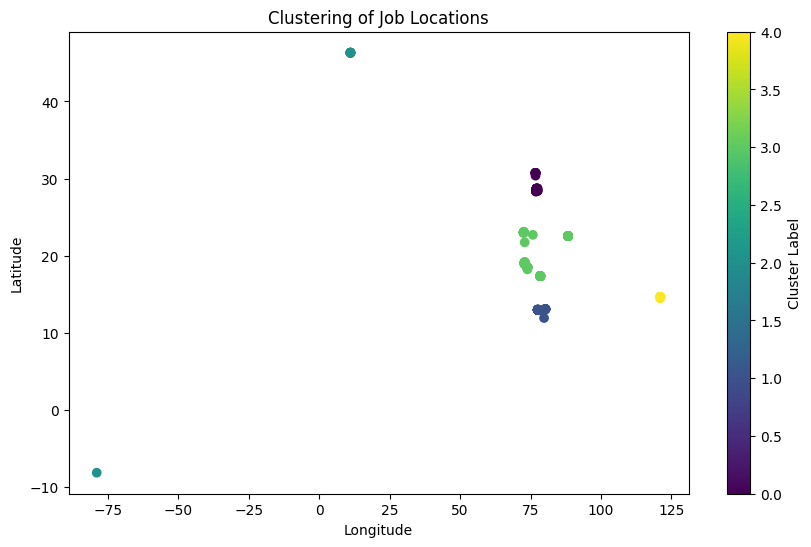

: 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing 'Longitude' or 'Latitude' for clustering
location_data = data[['Longitude', 'Latitude']].dropna()

# Ensure we only use valid data for clustering
if not location_data.empty:
    # Standardize the data
    scaler = StandardScaler()
    scaled_location_data = scaler.fit_transform(location_data)

    # Set the number of clusters (e.g., 5 clusters)
    num_clusters = 5

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_location_data)

    # Add cluster labels to the original DataFrame for rows that were used
    data.loc[location_data.index, 'Location Cluster'] = cluster_labels

    # Display the updated DataFrame
    print(data[['Longitude', 'Latitude', 'Location Cluster']].head())

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Longitude'], data['Latitude'], c=data['Location Cluster'], cmap='viridis', marker='o')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Clustering of Job Locations')
    plt.colorbar(label='Cluster Label')
    plt.show()
else:
    print("Error: No valid location data available for clustering.")
